In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.contrib.tensor_forest.python import tensor_forest
from tensorflow.python.ops import resources
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import h5py
import timeit

df = pd.read_csv('sensor_sit_1_clean.csv')
df.columns = ['1', '2', '3', '4', 'd1', 'd2', 'd3', 'd4', 'hours', 'minutes', 'seconds']

flow = pd.read_csv('flow_sit_1_clean.csv')
flow.columns = ['Flow']

df.head()

,1,2,3,4,d1,d2,d3,d4,hours,minutes,seconds
0,0.472973,0.435167,0.455257,0.477778,0.000000,0.000000,0.000000,0.000000,21.0,20.0,42.214512
1,0.472973,0.435167,0.457494,0.477778,0.000000,0.000000,0.121775,0.000000,21.0,20.0,42.223697
2,0.460499,0.423379,0.450763,0.469547,-0.337820,-0.319236,-0.138964,-0.222896,21.0,20.0,42.236006
3,0.457294,0.422371,0.447354,0.465356,-0.330541,-0.229423,-0.221205,-0.295502,21.0,20.0,42.246009
4,0.456239,0.422578,0.446223,0.462834,-0.260125,-0.145239,-0.181376,-0.274259,21.0,20.0,42.257102


In [3]:
def scaleFlow(flow):
    
    flow_scaled = []
    
    for i in range(0, len(flow)):
        
        flow_scaled.append((flow['Flow'][i] - min(flow['Flow'])) / (max(flow['Flow']) - min(flow['Flow'])))
        
    return pd.DataFrame(flow_scaled, columns = ['Flow'])

flow = scaleFlow(flow)

In [79]:
flowClass = []
in_to_none = []
none_to_in = []
ex_to_none = []

for i in range(0, len(flow)):
    
    if flow['Flow'][i] > 0.75 or flow['Flow'][i] < 0.2:
        flowClass.append('No Class')
        
    elif flow['Flow'][i] < 0.75 and flow['Flow'][i+1] > 0.75:
        in_to_none.append(i)
    
    elif flow['Flow'][i] < 0.25 and flow['Flow'][i+1] > 0.25:
        none_to_in.append(i)
        
    elif flow['Flow'][i] > 0.25 and flow['Flow'][i+1] < 0.25:
        ex_to_none.append(i)
        
    

In [136]:
def classLabel(flow):

    state = []
    action = []

    for i in range(0, len(flow)):

        if i > len(flow)-2:
            state.append('none')

        else:

            if flow['Flow'][i] < 0.75 and flow['Flow'][i+1] > 0.75:
                action.append('none')

            if flow['Flow'][i] < 0.3 and flow['Flow'][i+1] > 0.3:
                action.append('in')

            if flow['Flow'][i] > 0.3 and flow['Flow'][i+1] < 0.3:
                action.append('none')

            if flow['Flow'][i] > 0.75 and flow['Flow'][i+1] < 0.75:
                action.append('ex')

            if len(action) > 1:
                state.append(action[-1])

            else:
                state.append('none')
                
    return state

state = classLabel(flow) 

In [134]:
len(state)

6599

In [117]:
len(flow)

6599

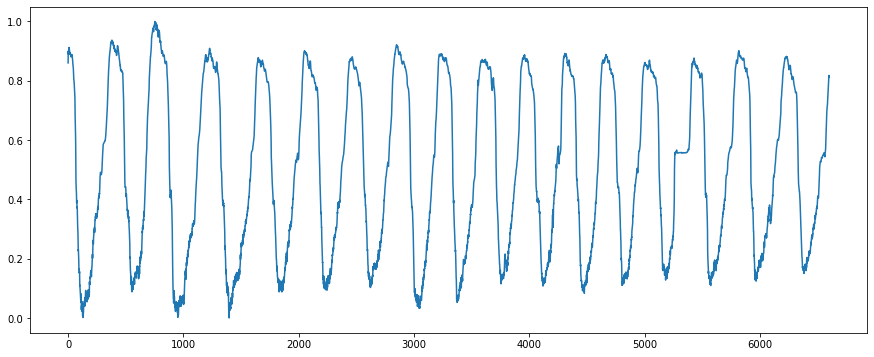

In [11]:
fig = plt.figure(figsize = (15, 6))
plt.plot(flow['Flow'])

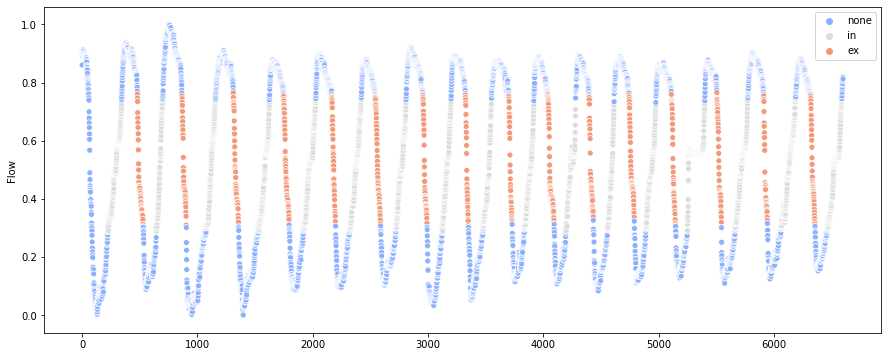

In [137]:
fig = plt.figure(figsize = (15, 6))
sns.scatterplot(y = flow['Flow'], x = range(0, len(flow)), hue = state, palette = 'coolwarm')